In [2]:
import pandas as pd 
import re

f = open('whatsaap-data.txt','r',encoding='utf-8')
data = f.read()

def preprocess(data):
    pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\?pm\s-\s'
    messages = re.split(pattern, data)[1:]
    dates_uncleared = re.findall(pattern, data)
    dates = [s.replace('?pm', '') for s in dates_uncleared]
    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

    df.rename(columns={'message_date': 'date'}, inplace=True)
    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])
    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'],inplace=True)
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name
    df['day'] = df['date'].dt.day
    df['minute'] = df['date'].dt.minute
    df.drop(columns=["date"],inplace=True)
    return df


In [3]:
da = preprocess(data)
da.shape[0]

351

In [4]:
total_unique_users = da['user'].nunique()
unique_user_names = da['user'].unique()

In [5]:

print("Total unique users:", total_unique_users)
print("Unique user names:", unique_user_names)


Total unique users: 3
Unique user names: ['vishal' 'Sumit Chauhan' 'Vishal Topper  Tiwari']


In [6]:

    da

,user,message,year,month,day,minute
0,vishal,Hsjdb\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,27
1,vishal,Nsjsjsn\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,27
2,vishal,Snsnsbks\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,27
3,vishal,Nshdbss\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,27
4,vishal,Bshshsn\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,27
...,...,...,...,...,...,...
346,Sumit Chauhan,Randi sali\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,34
347,vishal,Me Mera land\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,34
348,Sumit Chauhan,Gandi\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,34
349,Sumit Chauhan,Mera bhi\n,2023,<bound method PandasDelegate._add_delegate_acc...,25,34


In [7]:
da['message']

0              Hsjdb\n
1            Nsjsjsn\n
2           Snsnsbks\n
3            Nshdbss\n
4            Bshshsn\n
            ...       
346       Randi sali\n
347     Me Mera land\n
348            Gandi\n
349         Mera bhi\n
350    Jhato me uski\n
Name: message, Length: 351, dtype: object

In [8]:
word = []
for message in da['message']:
    word.extend(message.split())
    

In [9]:
word

['Hsjdb',
 'Nsjsjsn',
 'Snsnsbks',
 'Nshdbss',
 'Bshshsn',
 'Snsvsjakb',
 'Snsinaa',
 'Nahakns',
 'Baisnbs',
 'Sblog',
 'km',
 'se',
 'km',
 '100',
 'message',
 'kroo',
 'Bsbsbs',
 '...',
 'Hsbbbs',
 'Hahbsbs',
 'Nananma',
 'NHzgs',
 's',
 'Bsgs',
 'znuz',
 'BavanJ',
 '??????',
 '??hav',
 'zzh',
 'VAvzgsgsjajvshzbz',
 'Bzhsb',
 'BzhzNaj',
 'BajanaiUs',
 'chutiya',
 'iitna',
 'time',
 'nhi',
 'h',
 'Bwdbd',
 'Bsjssn',
 'Bsjsbs',
 'Bshsbsh',
 'Jsnsjs',
 'Nsnsnsn',
 'Bsjsbs',
 'Zjzjjz',
 'Bsbsbsb',
 'Xhdhsh',
 'Dhdhsh',
 'Hsbsbsh',
 'Habsbs',
 'Shshhs',
 'Dhshhshs',
 'Bshsbs',
 'Nsbsbs',
 'Shhshsh',
 'Bsbsb',
 'Hshshsh',
 'S',
 'sbsb',
 'Hzhshhs',
 'Bsbsbx',
 'Bsbsbs',
 'Jshsjjs',
 'Bsbshx',
 'Hshshsj',
 'Bsbsj',
 'Jsjshhs',
 'Sbdbdj',
 'Jsjsjsh',
 'Bshzjz',
 'Hshhshs',
 'Bsbsbx',
 'bsbsjxj',
 'Hshshhs',
 'Bsjsjz',
 'Hshshshdj',
 'Bsbsj',
 'Ushsjsjd',
 'Bsbshz',
 'Hshshhs',
 'Bsbsj',
 'Hshsjsh',
 'Bsdhuxux',
 'Hzhshsb',
 'Snskmazbhx',
 'Hzhzhshjzh',
 'Sbxh',
 'Sbbsj',
 'Jajhshs',
 'Sbdhhz

In [10]:
separator = " "  # Specify the separator you want between the words

resulting_string = separator.join(word)
print(resulting_string)

Hsjdb Nsjsjsn Snsnsbks Nshdbss Bshshsn Snsvsjakb Snsinaa Nahakns Baisnbs Sblog km se km 100 message kroo Bsbsbs ... Hsbbbs Hahbsbs Nananma NHzgs s Bsgs znuz BavanJ ?????? ??hav zzh VAvzgsgsjajvshzbz Bzhsb BzhzNaj BajanaiUs chutiya iitna time nhi h Bwdbd Bsjssn Bsjsbs Bshsbsh Jsnsjs Nsnsnsn Bsjsbs Zjzjjz Bsbsbsb Xhdhsh Dhdhsh Hsbsbsh Habsbs Shshhs Dhshhshs Bshsbs Nsbsbs Shhshsh Bsbsb Hshshsh S sbsb Hzhshhs Bsbsbx Bsbsbs Jshsjjs Bsbshx Hshshsj Bsbsj Jsjshhs Sbdbdj Jsjsjsh Bshzjz Hshhshs Bsbsbx bsbsjxj Hshshhs Bsjsjz Hshshshdj Bsbsj Ushsjsjd Bsbshz Hshshhs Bsbsj Hshsjsh Bsdhuxux Hzhshsb Snskmazbhx Hzhzhshjzh Sbxh Sbbsj Jajhshs Sbdhhz Hshshsh Hsjsh Bsbsjjz Aa Hsbsjz A A Sbbdjx A A Sbdbjz A Aa Jsjjxh A Aa A Sbbshx A A HsbsbM A Sbs A A Ana A A Aasas A Z A Z A Aaa Xx X A A Ss S A S A Zz Z A A A Xxxx Aa Xx A A Scc A F A A Dsz A Aa Xxxx Aqaa X Aaa Aa Zxd Aa Aaaa A A A A Aaa A A A A Aa Aa Aa A A Xxd A F A Dddf A Aa Dd A Fd Aa D A A Dddf A F Aa A A A D ?? A A Aaaa Aaaa Aa Xxdd A D Ddddd Dd D D Dd

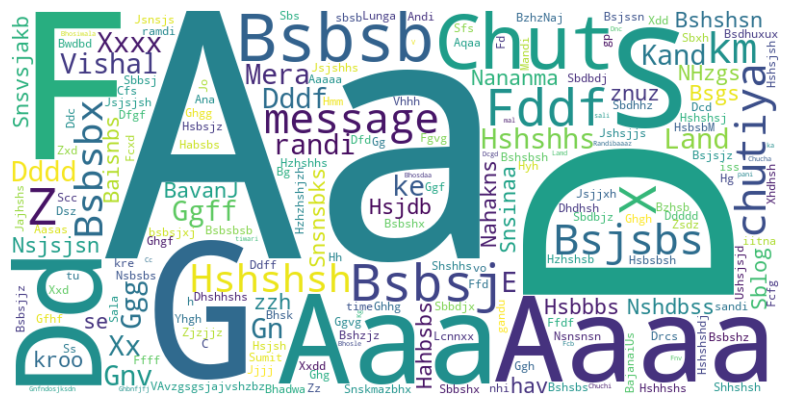

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resulting_string)

plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Turn off axis
plt.show()  # Show the plot



In [20]:
from collections import Counter
word_count = pd.DataFrame(Counter(word).most_common(20))


In [21]:
word_count

,0,1
0,A,72
1,Aa,24
2,D,17
3,F,13
4,G,11
5,S,4
6,Aaa,4
7,Aaaa,4
8,Dd,4
9,Bsbsj,3


In [42]:
temp = da[da['message'] != "group_notification"]
temp = da[da['message'] != "<media omitted>\n"]


In [43]:
f = open("stopwords.txt",'r')
stop_words = f.read()


In [44]:
words =[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
            
words

['hsjdb',
 'nsjsjsn',
 'snsnsbks',
 'nshdbss',
 'bshshsn',
 'snsvsjakb',
 'snsinaa',
 'nahakns',
 'baisnbs',
 'sblog',
 'km',
 'km',
 '100',
 'message',
 'kroo',
 'bsbsbs',
 '...',
 'hsbbbs',
 'hahbsbs',
 'nananma',
 'nhzgs',
 'bsgs',
 'znuz',
 'bavanj',
 '??????',
 '??hav',
 'zzh',
 'vavzgsgsjajvshzbz',
 'bzhsb',
 'bzhznaj',
 'bajanaius',
 'chutiya',
 'iitna',
 'time',
 'nhi',
 'bwdbd',
 'bsjssn',
 'bsjsbs',
 'bshsbsh',
 'jsnsjs',
 'nsnsnsn',
 'bsjsbs',
 'zjzjjz',
 'bsbsbsb',
 'xhdhsh',
 'dhdhsh',
 'hsbsbsh',
 'habsbs',
 'shshhs',
 'dhshhshs',
 'bshsbs',
 'nsbsbs',
 'shhshsh',
 'bsbsb',
 'hshshsh',
 'sbsb',
 'hzhshhs',
 'bsbsbx',
 'bsbsbs',
 'jshsjjs',
 'bsbshx',
 'hshshsj',
 'bsbsj',
 'jsjshhs',
 'sbdbdj',
 'jsjsjsh',
 'bshzjz',
 'hshhshs',
 'bsbsbx',
 'bsbsjxj',
 'hshshhs',
 'bsjsjz',
 'hshshshdj',
 'bsbsj',
 'ushsjsjd',
 'bsbshz',
 'hshshhs',
 'bsbsj',
 'hshsjsh',
 'bsdhuxux',
 'hzhshsb',
 'snskmazbhx',
 'hzhzhshjzh',
 'sbxh',
 'sbbsj',
 'jajhshs',
 'sbdhhz',
 'hshshsh',
 'hsjsh',


In [48]:
import re 
# Regular expression to match emojis
emoji_pattern = re.compile("[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]")

# Function to extract emojis from a string
def extract_emojis(text):
    return ''.join(emoji_pattern.findall(text))

# Extract emojis from each string in the list
emojis_list = [extract_emojis(text) for text in words]

# Filter out any empty strings
emojis_list = [emoji for emoji in emojis_list if emoji]

# Print the list of extracted emojis
print(emojis_list)


[]


In [45]:
from collections import Counter
word_count = pd.DataFrame(Counter(words).most_common(20))
word_count


,0,1
0,aa,24
1,aaa,4
2,aaaa,4
3,dd,4
4,chut,4
5,bsbsj,3
6,fddf,3
7,km,2
8,message,2
9,bsbsbs,2
